# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


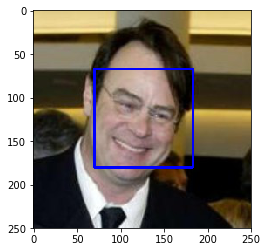

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
98% of human images with a detected face and 17% of dog images with a detected face

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
correct_human_pred = 0
wrong_dog_pred = 0
for image_path in human_files_short:
    if face_detector(image_path):
        correct_human_pred += 1
for image_path in dog_files_short:
    if face_detector(image_path):
        wrong_dog_pred += 1
print('Percentage of correctly predicted human faces is {}%'.format(correct_human_pred))
print('Percentage of wrongly predicted dog faces is {}%'.format(wrong_dog_pred))

Percentage of correctly predicted human faces is 98%
Percentage of wrongly predicted dog faces is 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 117229739.52it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    transform = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.485, 0.456, 0.406),
                                                       (0.229, 0.224, 0.225))])
    img = Image.open(img_path)
    trans_img = transform(img)
    if use_cuda:
        trans_img = trans_img.cuda()
    pred = VGG16.forward(torch.unsqueeze(trans_img, 0))
    pred_indx = torch.argmax(pred).item()
    return pred_indx # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if 151<=VGG16_predict(img_path)<=268:
        return True
    return False# true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
1% of images in human_files_short have a detected dog
100% of images in dog_files_short have a detected dog

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_image_detects_dog = 0
dog_image_detects_dog = 0

for image_path in human_files_short:
    if dog_detector(image_path):
        human_image_detects_dog += 1
        
for image_path in dog_files_short:
    if dog_detector(image_path):
        dog_image_detects_dog += 1

print('Percentage of the images in human_files_short that have a detected dog is {}%'.format(human_image_detects_dog))
print('Percentage of the images in dog_files_short that have a detected dog is {}%'.format(dog_image_detects_dog))

Percentage of the images in human_files_short that have a detected dog is 1%
Percentage of the images in dog_files_short that have a detected dog is 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
densenet = models.densenet121(pretrained=True)

#move to GPU if cuda is available
if use_cuda:
    densenet = densenet.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 105801446.55it/s]


In [11]:
from PIL import Image
import torchvision.transforms as transforms

def densenet_predict(img_path):
    transform = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.485, 0.456, 0.406),
                                                       (0.229, 0.224, 0.225))])
    img = Image.open(img_path)
    trans_img = transform(img)
    if use_cuda:
        trans_img = trans_img.cuda()
    pred = VGG16.forward(torch.unsqueeze(trans_img, 0))
    pred_indx = torch.argmax(pred).item()
    return pred_indx # predicted class index

In [12]:
def densnet_dog_detector(img_path):
    if 151<=densenet_predict(img_path)<=268:
        return True
    return False

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_image_detects_dog = 0
dog_image_detects_dog = 0

for image_path in human_files_short:
    if densnet_dog_detector(image_path):
        human_image_detects_dog += 1
        
for image_path in dog_files_short:
    if densnet_dog_detector(image_path):
        dog_image_detects_dog += 1

print('DenseNet121 performance:')
print('Percentage of the images in human_files_short that have a detected dog is {}%'.format(human_image_detects_dog))
print('Percentage of the images in dog_files_short that have a detected dog is {}%'.format(dog_image_detects_dog))

DenseNet121 performance:
Percentage of the images in human_files_short that have a detected dog is 1%
Percentage of the images in dog_files_short that have a detected dog is 100%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 64

train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomVerticalFlip(),
                                     transforms.RandomRotation((15, 75)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_valid_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('/data/dog_images/train', transform=train_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=test_valid_transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=test_valid_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True) 
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
                                          

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:(i)While preprocessing the training data, I used a 'RandomResizedCrop' (to crop the images to a random size and aspect ration) size of 224x224 pixels. This was used because I wanted to match the size with the input size for pytorch's pre-trained models trained on ImageNet. This would allow me to reuse this transform for the transfer learning part of the project. However, for the test and validation tranforms, I initially resized the image to 255x255 before taking a center crop of 224x224. I did not use the 'RandomResizedCrop' in this case because the transform is affecting images that show the actual performance of the model, so the changes should not be randomized.

(ii)Yes, I augmented only the training dataset. I randomly flipped the images both horizontally and vertically using the default flip probabilty of 0.5. I also randomly rotated the images between 15degrees and 75degrees.

All images where converted to tensors and then normalized(to help the CNN learn better) as shown. I decided to use those mormalization value after doing some research on image classification and learning that it helps to keep the values between [-1,1] After these preprocessing stage, all images have a shape of [3, 224, 224]

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.fc1 = nn.Linear(14*14*128, 256)
        self.fc2 = nn.Linear(256, 133 )
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        #flatten the image
        x = x.view(-1, 14*14*128)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ My CNN architecture is made up of 4 convolutional layers (in order to extract as many features as possible), each followed by a max pooling layer, 2 fully connected layers and 2 dropout layers. __All convolutional layers__ have a kernel size of 3, a value I chose after noticing how often it was used in the class as well as other image classification algorithms I saw online. This kernel size informed my decision to use a padding value of 1 inorder to have the same sized output as input (in the x and y dimension). I aslo chose the out_channel sizes of all the convolutional layer to be increasing indices of 2. (i.e 16, 32, 64, 128). The outputs of the convolutional layers are acted upon by the relu activation function. The max pooling layers have a kernel size and stride of 2 so as to reduce the dimension of the rectified convolutional output by a factor of 2.

__x = self.pool(F.relu(self.conv1(x))):__ The conv1 layer has an in_channel size of 3 (equal to the channel dimension of the input image), an out_channel size of 16. The pooling layer would reduce the image size by a factor of 2. Image size goes from [3, 224, 224] to [16, 112, 112].

__'x = self.pool(F.relu(self.conv2(x)))' >> 'x = self.pool(F.relu(self.conv3(x)))' >> 'x = self.pool(F.relu(self.conv4(x)))'__ These change image size from [16, 112, 112] to [32, 56, 56] to [64, 28, 28] to [128, 14, 14] through a process similar to that explained earlier.

After the successive convolutional and max pooling layers giving an image size of [128, 14, 14], I flattened this image inorder to fit it into the following fully connected layers. I then applied a dropout function with a probability of 0.2 (I arbitrarily chose this value) to randomly 'drop' units during training to avoid overfitting. 

__x = F.relu(self.fc1(x)):__ This linear layer has 128x14x14 input neurons and 256(a value I decided to test out to see if it works fine) output neurons. Then the same dropout function mentioned earlier is applied to the output of this layer to prevent overfitting.

__x = self.fc2(x):__ This final layer of the model has 256 input neurons and 133(the no of classes present in the dataset) output neurons. I did not apply any activation function(specifically the softmax function for multiclass classification) after this because I intend to use CrossEntropyLoss as my loss function and this already has it built in.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

loaders_scratch = {'train': train_loader,
                  'valid': valid_loader,
                  'test': test_loader}

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            loss.backward()
            optimizer.step()
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased from {:.6f} to {:.6f}.  Saving Model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.025593 	Validation Loss: 4.049540
Validation loss decreased from inf to 4.049540.  Saving Model ...
Epoch: 2 	Training Loss: 3.991106 	Validation Loss: 3.965428
Validation loss decreased from 4.049540 to 3.965428.  Saving Model ...
Epoch: 3 	Training Loss: 3.953863 	Validation Loss: 3.959207
Validation loss decreased from 3.965428 to 3.959207.  Saving Model ...
Epoch: 4 	Training Loss: 3.930103 	Validation Loss: 3.960370
Epoch: 5 	Training Loss: 3.901287 	Validation Loss: 4.066586
Epoch: 6 	Training Loss: 3.887747 	Validation Loss: 3.903699
Validation loss decreased from 3.959207 to 3.903699.  Saving Model ...
Epoch: 7 	Training Loss: 3.835306 	Validation Loss: 3.881398
Validation loss decreased from 3.903699 to 3.881398.  Saving Model ...
Epoch: 8 	Training Loss: 3.841537 	Validation Loss: 3.827082
Validation loss decreased from 3.881398 to 3.827082.  Saving Model ...
Epoch: 9 	Training Loss: 3.793401 	Validation Loss: 3.842529
Epoch: 10 	Training Loss: 3.78

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.231561


Test Accuracy: 19% (166/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [9]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
## TODO: Specify data loaders
#Using the same data loaders from the previous step except the Normalization mean and standard deviation has been changed to suit VGG16
batch_size = 64

train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomVerticalFlip(),
                                     transforms.RandomRotation((15, 75)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])

test_valid_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder('/data/dog_images/train', transform=train_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=test_valid_transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=test_valid_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True) 
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
                                          
loaders_transfer = {'train': train_loader,
                  'valid': valid_loader,
                  'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [10]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)

#freeze training for all feature layers 
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
#re-define final classification layer
model_transfer.classifier = nn.Linear(1024, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()
print(model_transfer)

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 110326712.68it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ For this problem, I started by downloading the pretrained DenseNet121 model from pytorch's model package. I used this after trying out the VGG16 architecture but not reaching the minimum test accuracy. Since this model was trained on Imagenet, a dataset of 1000 images categories (with over a 100 of those categories being dogs and I'm working on a dog dataset), I decided to keep all the layers of this model except the final layer that classifies into a 1000 categories. Also, as a result of the dataset similarity earlier pointed out, I decided to use the pretrained weights of the features part of the VGG16 model. Then, I re-defined the final (and only) fully connected layer of this model to suit the number of dog classes(i.e 133) present in the dog dataset. 
I think my architecture is suitable for this problem because the dog dataset is similar to the ImageNet dataset and it is also a very small dataset. The architecture capitalizes on the knowledge/extracted features of the the densenet121 model and only changes the final layer that divides images into their respective categories.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [9]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.009)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [13]:
# train the model
n_epochs = 30
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.537832 	Validation Loss: 1.476077
Validation loss decreased from inf to 1.476077.  Saving Model ...
Epoch: 2 	Training Loss: 2.738368 	Validation Loss: 1.488033
Epoch: 3 	Training Loss: 2.617265 	Validation Loss: 1.532221
Epoch: 4 	Training Loss: 2.575032 	Validation Loss: 1.825875
Epoch: 5 	Training Loss: 2.574695 	Validation Loss: 1.428064
Validation loss decreased from 1.476077 to 1.428064.  Saving Model ...
Epoch: 6 	Training Loss: 2.636184 	Validation Loss: 1.567330
Epoch: 7 	Training Loss: 2.636221 	Validation Loss: 1.629423
Epoch: 8 	Training Loss: 2.639986 	Validation Loss: 1.469871
Epoch: 9 	Training Loss: 2.638836 	Validation Loss: 1.760757
Epoch: 10 	Training Loss: 2.724412 	Validation Loss: 1.759984
Epoch: 11 	Training Loss: 2.694190 	Validation Loss: 1.681394


KeyboardInterrupt: 

__PLEASE NOTE: I interrupted the above cell to conserve my allocated GPU time after noticing that the validation loss was no longer decreasing __ 

In [34]:
if use_cuda:
    device='cuda'
else:
    device='cpu'

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=device))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [15]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.653378


Test Accuracy: 64% (540/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [53]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
data_transfer = {'train': train_data,
                  'valid': valid_data,
                  'test': test_data}
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    trans_img = test_valid_transform(img)
    pred = model_transfer.forward(torch.unsqueeze(trans_img, 0))
    pred_indx = torch.argmax(pred).item()
    return class_names[pred_indx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [50]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import random
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

error_messages = ["Uh oh! I can't tell what you are",
                 "Ooops! I'm stumped",
                 "Too bad! I can only identify humans and dogs :("]
def show_image(image_path):
    %matplotlib inline
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img.show()
    imshow(np.asarray(img))
    plt.show()

def run_app(img_path):    
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        print('\nWoof! Woof!')
        show_image(img_path)
        print('You are a', predict_breed_transfer(img_path)) 
    elif face_detector(img_path):
        print('\nHello, human!')
        show_image(img_path)
        print('You look like', predict_breed_transfer(img_path))
    else:
        print()
        print(random.choice(error_messages))
        show_image(img_path)
        print('Why not try out another image?')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output was worse than I expected. Improvement opportunities include:

(i)Try a different pre-trained model to try to achieve an higher accuracy

(ii)Train for longer and try out different optimizers(and learning rates)

(iii)Develop an algorithm that identifies more than one class in a picture


Hello, human!


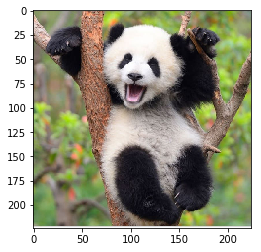

You look like Dachshund

Not an Image!

Hello, human!


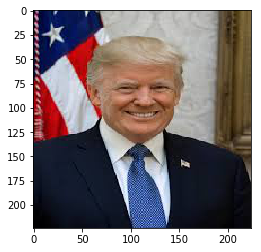

You look like Afghan hound

Woof! Woof!


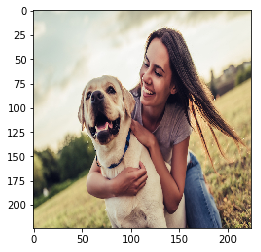

You are a Afghan hound

Hello, human!


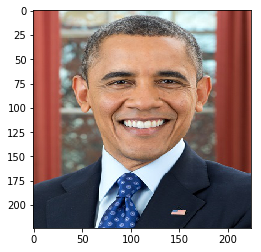

You look like Chow chow

Too bad! I can only identify humans and dogs :(


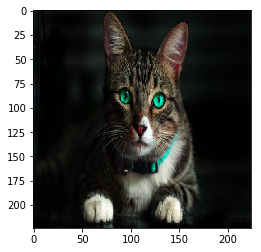

Why not try out another image?

Woof! Woof!


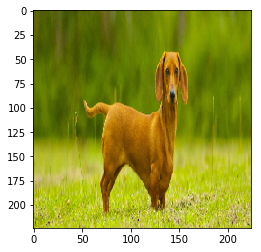

You are a Chow chow

Woof! Woof!


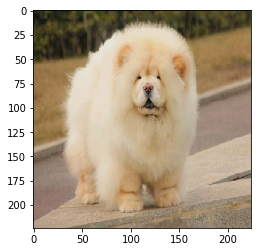

You are a Afghan hound


In [51]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

for image in os.listdir('pc_images'):
    image_path = os.path.join('pc_images', image)
    try:
        run_app(image_path)
    except IOError:
        print('\nNot an Image!')
    
